<a href="https://colab.research.google.com/github/jjsalam/Colab-files/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Customer ID    Age  Gender Interaction Type  Interaction Time  \
0      C07838   27.0    Male           viewed        118.926634   
1      C03743   49.0  Female    added to cart        204.650579   
2      C09671   66.0    Male           viewed         98.261520   
3      C05724  101.0  Female           viewed        -45.553209   
4      C08988   21.0  Female    added to cart         24.995868   

  Product Category  Past Purchases   Ad Type  Purchase  
0        groceries            14.0     video       1.0  
1          apparel             8.0     image       1.0  
2        groceries             7.0     image       0.0  
3        groceries            16.0     video       0.0  
4      electronics            14.0  carousel       0.0  

Missing values before preprocessing:
Customer ID         64
Age                 48
Gender              62
Interaction Type    63
Interaction Time    43
Product Category    48
Past Purchases      53
Ad Type             61
Purchase            54
dtype: int

<ipython-input-8-ea5da66d90d4>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


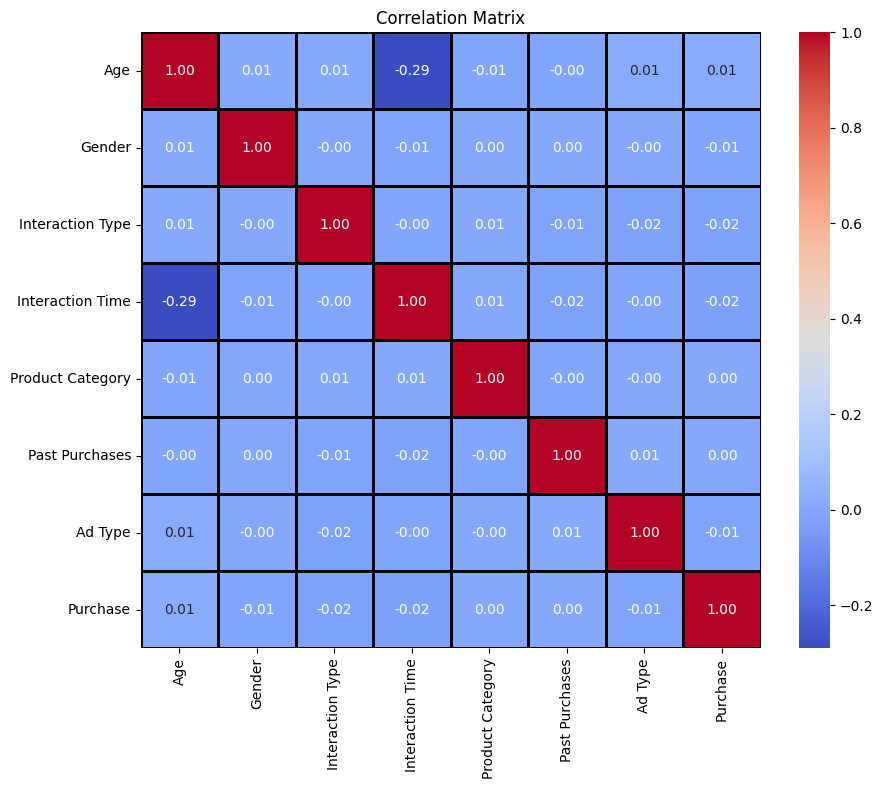

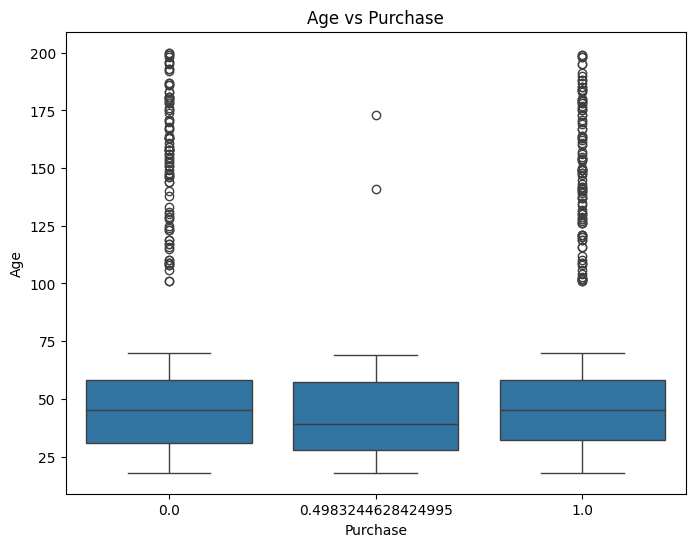

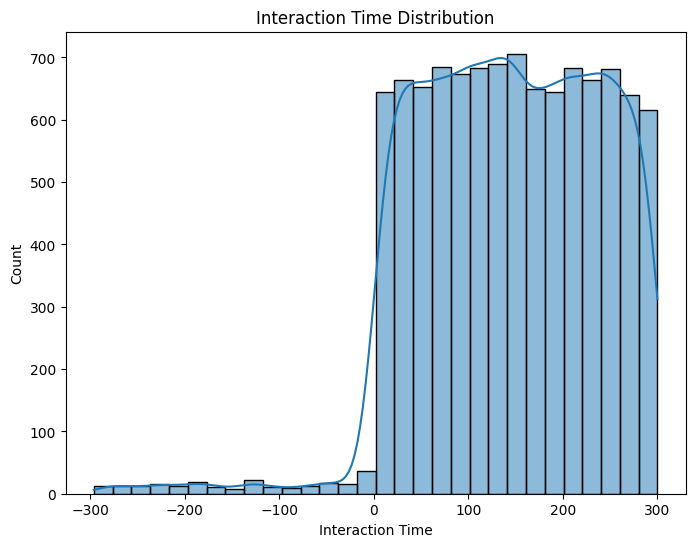


Logistic Regression Evaluation:
Accuracy: 0.5191176470588236
Precision: 0.5240641711229946
Recall: 0.3854473942969518
F1-score: 0.4441926345609065


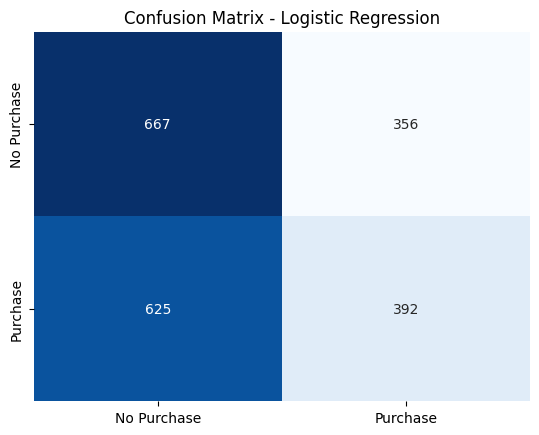


Random Forest Evaluation:
Accuracy: 0.5259803921568628
Precision: 0.5247524752475248
Recall: 0.5211406096361848
F1-score: 0.5229403058707449


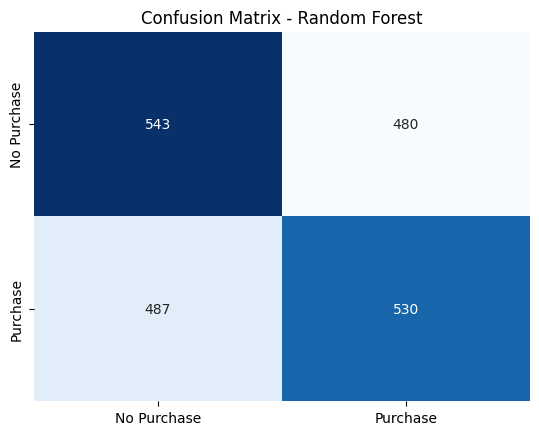


Random Forest Cross-validation Scores: [0.53676471 0.5245098  0.51911765 0.53382353 0.5122549 ]
Random Forest Mean CV Accuracy: 0.5252941176470588

Logistic Regression Cross-validation Scores: [0.51323529 0.51029412 0.52892157 0.51323529 0.48039216]
Logistic Regression Mean CV Accuracy: 0.5092156862745097


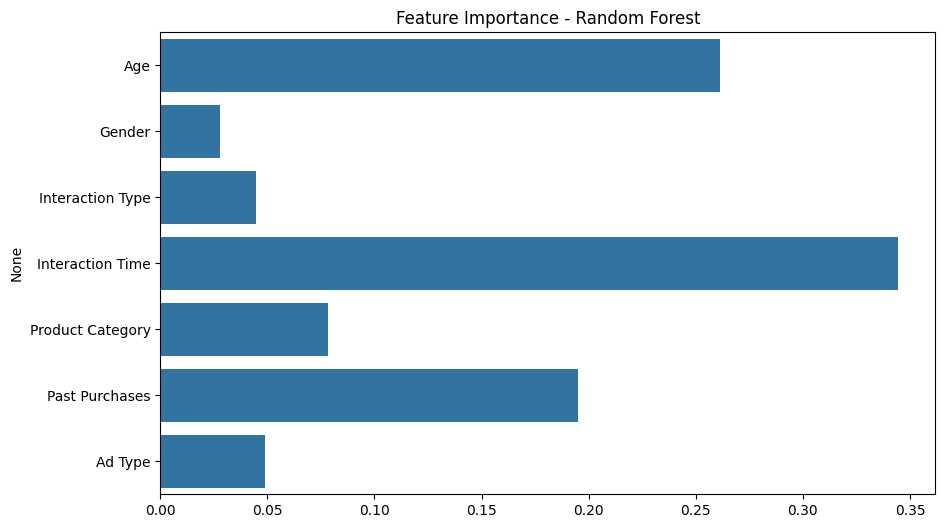


Business Insights:
            Feature  Importance
3  Interaction Time    0.344574
0               Age    0.261156
5    Past Purchases    0.194787
4  Product Category    0.078233
6           Ad Type    0.048815
2  Interaction Type    0.044710
1            Gender    0.027726


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/customer_interactions.csv')

# Display the first few rows
print(df.head())

# 1. Data Preprocessing
# Check for missing values
print("\nMissing values before preprocessing:")
print(df.isnull().sum())

# Handle missing values
# Fill numerical columns with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle categorical columns: fill with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Handle categorical variables by encoding them using LabelEncoder
le = LabelEncoder()

# Encode categorical columns
df['Gender'] = le.fit_transform(df['Gender'])
df['Interaction Type'] = le.fit_transform(df['Interaction Type'])
df['Ad Type'] = le.fit_transform(df['Ad Type'])

# Encode the 'Product Category' column (this was missing)
df['Product Category'] = le.fit_transform(df['Product Category'])

# Now, check the data types to ensure that all columns are numeric
print("\nData types after encoding:")
print(df.dtypes)

# 3. Exploratory Data Analysis (EDA)

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())

# Visualizing the correlation matrix
# Only select numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

# Visualizing Age vs Purchase
plt.figure(figsize=(8, 6))
sns.boxplot(x='Purchase', y='Age', data=df)
plt.title('Age vs Purchase')
plt.show()

# Visualizing Interaction Time distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Interaction Time'], kde=True, bins=30)
plt.title('Interaction Time Distribution')
plt.show()

# 4. Model Building

# Define features (X) and target (y)
X = df.drop(columns=['Customer ID', 'Purchase'])  # Dropping 'Customer ID' and 'Purchase' as the target
y = df['Purchase']

# *** Convert 'Purchase' to binary (0 or 1) if it's continuous ***
y = (y > 0.5).astype(int)  # Convert to 1 if greater than 0.5, else 0

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.1 Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression model
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 4.2 Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix - Random Forest')
plt.show()

# 5. Model Evaluation - Cross Validation
# Cross-validation to assess stability and generalization ability

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-validation Scores:", cv_scores_rf)
print("Random Forest Mean CV Accuracy:", np.mean(cv_scores_rf))

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-validation Scores:", cv_scores_log_reg)
print("Logistic Regression Mean CV Accuracy:", np.mean(cv_scores_log_reg))

# 6. Conclusion and Business Insights

# Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.show()

# Business Insights
print("\nBusiness Insights:")
# From the Random Forest feature importance, we can identify which features have the most influence on predicting a purchase
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
important_features = important_features.sort_values(by='Importance', ascending=False)
print(important_features)
